## Задачи для совместного разбора

1\. Создайте тензор и исследуйте его основные характеристики

In [ ]:
import torch as th
th.__version__

'2.4.0+cu121'

In [ ]:
t = th.tensor([0, 2, 3,4,5])
t, t.dtype

(tensor([0, 2, 3, 4, 5]), torch.int64)

In [ ]:
t = th.Tensor([0,2,3,4,5]) #класс тенсор - float тип данных
t, t.dtype

(tensor([0., 2., 3., 4., 5.]), torch.float32)

In [ ]:
t.shape

torch.Size([5])

In [ ]:
t3 = th.rand(5,6,7) # случайные значнеия из равноемрного распределения от 0 до 1
t3.shape

torch.Size([5, 6, 7])

In [ ]:
t3.device #на cpu, gpu, tpu

device(type='cpu')

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [ ]:
t = th.rand(5,6,7)

In [ ]:
t[0,0,0]

tensor(0.7741)

In [ ]:
t[0,[0, 1],0]

tensor([0.7741, 0.5253])

In [ ]:
t[0, [0,1], :]

tensor([[0.7741, 0.0817, 0.4316, 0.1589, 0.6831, 0.4049, 0.5796],
        [0.5253, 0.1019, 0.3019, 0.5565, 0.6331, 0.0104, 0.5349]])

In [ ]:
t[0, [0,1]]

tensor([[0.7741, 0.0817, 0.4316, 0.1589, 0.6831, 0.4049, 0.5796],
        [0.5253, 0.1019, 0.3019, 0.5565, 0.6331, 0.0104, 0.5349]])

In [ ]:
t[0, [0,1], 3:5]

tensor([[0.1589, 0.6831],
        [0.5565, 0.6331]])

In [ ]:
t.size(0), t.shape #len(t)

(5, torch.Size([5, 6, 7]))

In [ ]:
mask = [False, False, True, True, False]
t[mask].shape

torch.Size([2, 6, 7])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [ ]:
t = th.arange(16).view(4,4)
t

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [ ]:
x = th.tensor([-1,1,-1,1])
t.shape, x.shape

(torch.Size([4, 4]), torch.Size([4]))

In [ ]:
t + x #x преобразовался автоматически в Size([4, 4])

tensor([[-1,  2,  1,  4],
        [ 3,  6,  5,  8],
        [ 7, 10,  9, 12],
        [11, 14, 13, 16]])

4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

In [ ]:
th.sin(t)

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794,  0.6570],
        [ 0.9894,  0.4121, -0.5440, -1.0000],
        [-0.5366,  0.4202,  0.9906,  0.6503]])

In [ ]:
import numpy as np
import torch as th
np.sin(t) #псле переноса на gpu не работает, тк numpy только на опреатинвой памяти работает

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794,  0.6570],
        [ 0.9894,  0.4121, -0.5440, -1.0000],
        [-0.5366,  0.4202,  0.9906,  0.6503]], dtype=torch.float64)

In [ ]:
#перенос на gpu
t = th.rand(10,5, device='cuda') #по умолчанию на cpu
t.device

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
th.sin(t)

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794,  0.6570],
        [ 0.9894,  0.4121, -0.5440, -1.0000],
        [-0.5366,  0.4202,  0.9906,  0.6503]])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [ ] Проверено на семинаре

In [ ]:
import numpy as np
import torch as th
t = th.zeros(100000, 10)
t.shape, t

(torch.Size([100000, 10]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [ ]:
for i in range(0,100000):
    t[i, np.random.randint(0,10)]+=1

In [ ]:
t[:5]

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
p = th.sum(t, 0)/100_000
for i in range(10):
    print(f'вероятность что 1 в {i+1} столбце = ', float(p[i]))

вероятность что 1 в 1 столбце =  0.09944000095129013
вероятность что 1 в 2 столбце =  0.09850999712944031
вероятность что 1 в 3 столбце =  0.1011900007724762
вероятность что 1 в 4 столбце =  0.10204999893903732
вероятность что 1 в 5 столбце =  0.1008400022983551
вероятность что 1 в 6 столбце =  0.09962999820709229
вероятность что 1 в 7 столбце =  0.10001999884843826
вероятность что 1 в 8 столбце =  0.10023999959230423
вероятность что 1 в 9 столбце =  0.09838999807834625
вероятность что 1 в 10 столбце =  0.09968999773263931


<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [ ] Проверено на семинаре

In [ ]:
t = th.randint(0,11,(10,10))
#t = th.arange(0,100).view(10,10)
t

tensor([[ 5,  7,  5,  2,  2,  4,  2,  8,  1,  0],
        [ 3,  4,  4,  1,  9,  5,  0,  2,  5,  7],
        [ 3,  8,  5,  7,  1,  6,  8, 10,  2,  4],
        [10,  8, 10,  7,  4, 10,  3,  6,  1,  9],
        [ 8,  6,  1, 10,  0, 10,  2,  0,  8,  2],
        [ 7,  6,  5, 10,  3,  8,  5,  4,  1,  3],
        [ 4,  5,  1,  3, 10,  5,  5,  8,  4,  1],
        [10,  8,  8,  9,  6,  4,  8, 10,  0,  2],
        [ 3,  8,  2,  1,  8,  8,  6,  0,  9, 10],
        [ 0,  8,  2,  3,  8,  1,  6, 10,  4,  0]])

In [ ]:
row = np.arange(9)
col = np.arange(8, -1, -1)

t[row, col]

tensor([ 1,  2,  8, 10,  0, 10,  1,  8,  3])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [ ] Проверено на семинаре

In [ ]:
t = th.randint(0,100,(5,5))
t

tensor([[98, 21, 76, 38, 71],
        [76, 29, 74, 99, 60],
        [77, 15, 82, 36, 62],
        [19, 33, 36, 81, 61],
        [56,  9, 47, 98, 52]])

In [ ]:
max_row, max_col = map(int, th.where(t==t.max()))
max_row, max_col

(1, 3)

In [ ]:
zero_m = th.zeros_like(t)
zero_m[max_row-1:max_row+2, max_col-1:max_col+2] = t[max_row-1:max_row+2, max_col-1:max_col+2]
zero_m

tensor([[ 0,  0, 76, 38, 71],
        [ 0,  0, 74, 99, 60],
        [ 0,  0, 82, 36, 62],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [ ] Проверено на семинаре

In [ ]:
t255 = th.cat([t,zero_m],0).view(2,5,5)
th.save(t255, 'tensor.pt')

In [ ]:
t_load = th.load('tensor.pt')

<ipython-input-26-a1c9d67e8cba>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t_load = th.load('tensor.pt')


In [ ]:
t_mask = t_load==t255
t_mask

tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])

In [ ]:
all(t_mask.view(50))

True

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [ ] Проверено на семинаре

In [ ]:
t = th.randint(1,10,(2,3,5,5), dtype=th.float32)
t

tensor([[[[5., 4., 7., 3., 1.],
          [2., 3., 2., 6., 9.],
          [6., 6., 1., 6., 7.],
          [3., 6., 8., 2., 7.],
          [9., 3., 8., 6., 3.]],

         [[9., 3., 5., 7., 4.],
          [1., 5., 1., 4., 3.],
          [7., 9., 9., 6., 1.],
          [9., 7., 7., 7., 7.],
          [1., 5., 8., 2., 2.]],

         [[6., 3., 1., 3., 4.],
          [7., 6., 4., 5., 4.],
          [7., 3., 5., 3., 6.],
          [3., 6., 1., 4., 4.],
          [4., 2., 7., 4., 1.]]],


        [[[1., 1., 7., 8., 9.],
          [2., 8., 9., 4., 9.],
          [8., 5., 8., 7., 9.],
          [4., 4., 9., 5., 2.],
          [8., 6., 4., 3., 6.]],

         [[8., 8., 1., 9., 6.],
          [3., 7., 8., 8., 7.],
          [4., 9., 3., 4., 7.],
          [6., 7., 9., 8., 1.],
          [8., 8., 3., 9., 6.]],

         [[9., 3., 8., 9., 5.],
          [8., 9., 7., 2., 5.],
          [5., 1., 8., 1., 4.],
          [1., 4., 9., 9., 3.],
          [6., 9., 2., 5., 1.]]]])

In [ ]:
mean_list = list()
for i in range(2):
    for j in range(3):
        mean_list.append(th.mean(t[i,j,:,:]))
mean_tensor = th.tensor(mean_list).view(2,3,1)
mean_tensor

tensor([[[4.9200],
         [5.1600],
         [4.1200]],

        [[5.8400],
         [6.2800],
         [5.3200]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [ ] Проверено на семинаре

In [ ]:
import numpy as np
import torch as th
lambd = 5.0  # среднее = 1 / λ
exp_numbers = th.distributions.Exponential(lambd).sample((100_000_000,))
exp_numbers.mean()

tensor(0.2000)

In [ ]:
import time
import matplotlib.pyplot as plt

bins = 1000
start_time = time.time()
hist_cpu = th.histc(exp_numbers, bins=bins)
end_time = time.time()
print(end_time - start_time,'секунд') #Время расчета гистограммы на CPU

2.9191064834594727 секунд


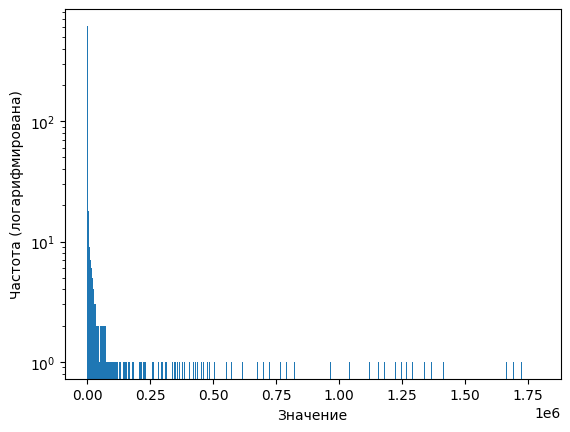

In [ ]:
plt.hist(hist_cpu, bins=bins, width)
plt.xlabel('Значение')
plt.ylabel('Частота (логарифмирована)')
plt.yscale('log')
plt.show()

In [ ]:
import torch as th
import time
import matplotlib.pyplot as plt

lambd = 5.0  # среднее = 1 / λ
bins = 1000
exp_numbers = th.distributions.Exponential(lambd).sample((100_000_000,))

start_time = time.time()
hist_gpu = th.histc(exp_numbers, bins=bins)
end_time = time.time()

print(end_time - start_time, 'секунд на GPU')

1.2805726528167725 секунд на GPU


<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

In [ ]:
import torch as th

t = th.randint(0,255,(1, 6, 6, 3))

mask = th.tensor([0])
t[:, 2:, :, 0] = t[:, 2:, :, 0]*mask
t[:, [0,1,4,5], :, 1] = t[:, [0,1,4,5], :, 1]*mask #t[:, [0,1,4,5], :, 1] = t[:, 2:, :, 0] так можно потому что справа нули
t[:, :4, :, 2] = t[:, :4, :, 2]*mask #t[:, :4, :, 2]  = t[:, 2:, :, 0]
t

tensor([[[[ 36,   0,   0],
          [ 20,   0,   0],
          [106,   0,   0],
          [199,   0,   0],
          [ 29,   0,   0],
          [111,   0,   0]],

         [[ 79,   0,   0],
          [206,   0,   0],
          [221,   0,   0],
          [166,   0,   0],
          [ 47,   0,   0],
          [ 60,   0,   0]],

         [[  0,  84,   0],
          [  0,  27,   0],
          [  0, 180,   0],
          [  0,  75,   0],
          [  0, 157,   0],
          [  0, 249,   0]],

         [[  0, 236,   0],
          [  0, 202,   0],
          [  0, 109,   0],
          [  0, 224,   0],
          [  0,  72,   0],
          [  0, 163,   0]],

         [[  0,   0,  45],
          [  0,   0, 170],
          [  0,   0, 251],
          [  0,   0,  93],
          [  0,   0, 191],
          [  0,   0,   3]],

         [[  0,   0, 105],
          [  0,   0, 208],
          [  0,   0, 210],
          [  0,   0,  13],
          [  0,   0, 233],
          [  0,   0, 148]]]])